# Bonus

Have fun with the `house.csv` dataset! 

Investigate the features and add them to your modelling to improve the performance 

⚠️ Don't forget to diagnose model performance along the way.

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
plt.style.use("dark_background")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
houses = pd.read_csv("../data/houses.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses.dtypes[:]

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 85, dtype: object

In [4]:
numeric = houses.select_dtypes(include=np.number)

In [15]:
numeric.keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Pesos',
       'RoofSurface', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
numeric_filtered = numeric[['Pesos', 'SalePrice']]
numeric_filtered = numeric_filtered.dropna()
numeric_filtered.isnull().sum()

Pesos        0
SalePrice    0
dtype: int64

In [44]:
numeric_filtered.head()

,Pesos,SalePrice
0,4170000.0,208500
1,3630000.0,181500
2,4470000.0,223500
3,2800000.0,140000
4,5000000.0,250000


In [31]:
numeric_test = numeric[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                       'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

In [26]:
numeric_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual
0,1,60,65.0,8450,7
1,2,20,80.0,9600,6
2,3,60,68.0,11250,7
3,4,70,60.0,9550,7
4,5,60,84.0,14260,8
...,...,...,...,...,...
1755,1457,20,85.0,13175,6
1756,118,20,74.0,8536,5
1757,253,60,65.0,8366,6
1758,199,75,92.0,5520,6


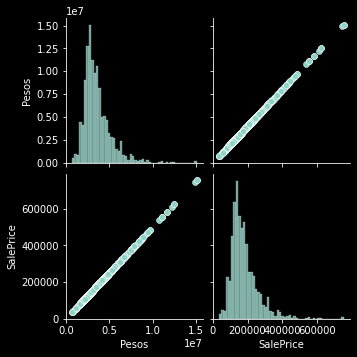

In [46]:
sns.pairplot(numeric_filtered)

<AxesSubplot:>

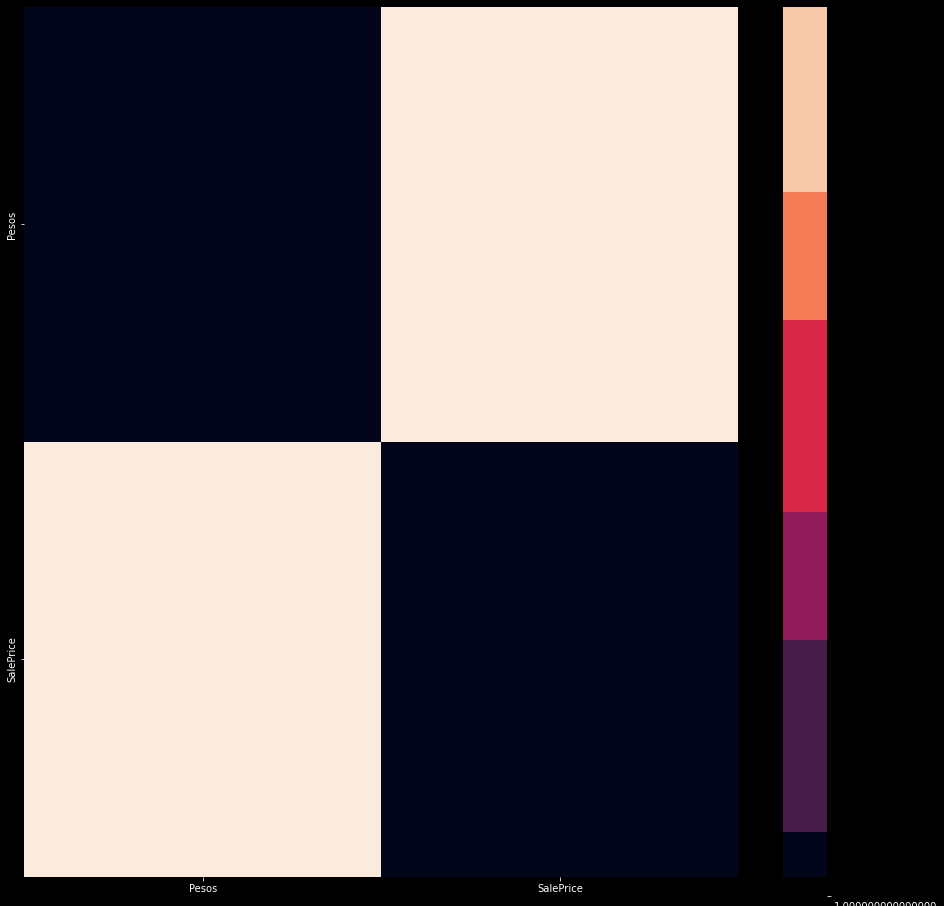

In [49]:
plt.figure(figsize=(16, 16))

sns.heatmap(numeric_filtered.corr())

In [39]:
X = numeric_filtered[['Pesos']]
y = numeric_filtered['SalePrice']

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Instantiate the model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

cv_score = cv_results['test_score'].mean()

model.fit(X, y)

LinearRegression()

In [43]:
cv_score

1.0

In [42]:
model.predict([[100000]])

/Users/christianklaus/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5000.])

# 🏁